In [39]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from shapely.geometry import shape
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap

In [7]:
# read csv
data = pd.read_csv('data/merged_data.csv')

# Load the GeoJSON file
geojson = gpd.read_file('data/CensusTracts2020.geojson')
geojson = geojson.rename(columns={'GEOID20':'CensusTract'})

/home/codespace/.python/current/lib/python3.10/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/tmp/ipykernel_6324/2906207792.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  epa_geo['Risk Quartile'].fillna('

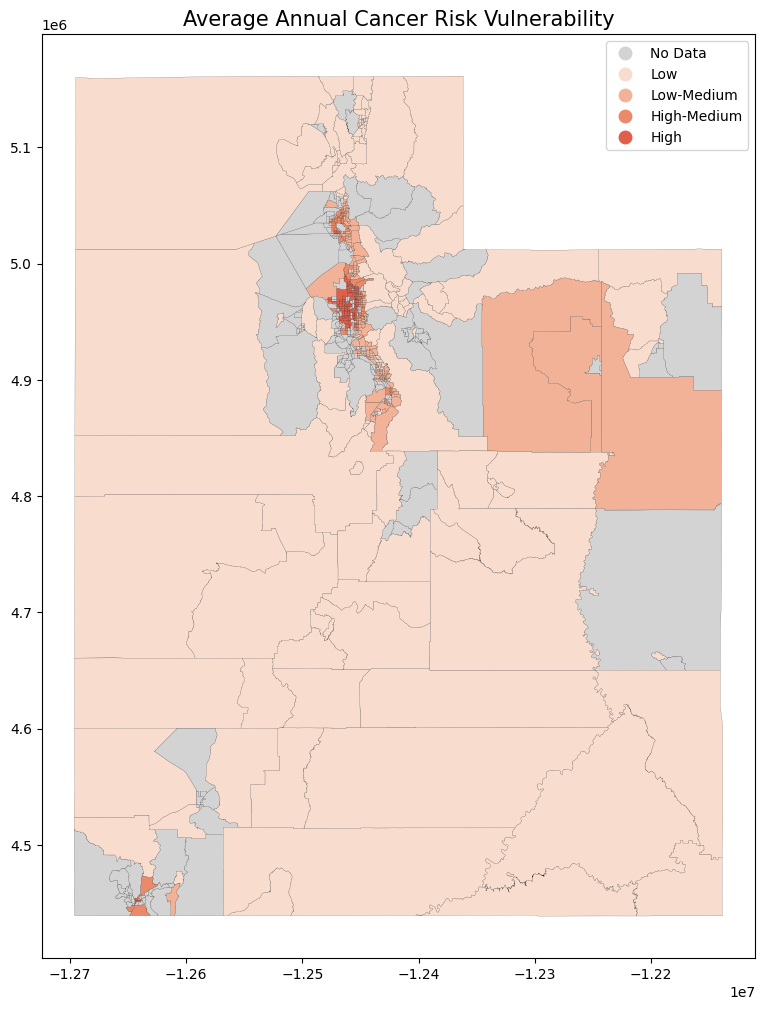

In [67]:
# EPA Map

# https://opendata.gis.utah.gov/datasets/utah-census-tracts-2020/about
# 2019 map

epa_data = data[['CensusTract','Year','County','Total Cancer Risk (per million)']]

# remove rows with NaN values
epa_data = epa_data.dropna()
#display(epa_data)

# get average cancer risk for all years
epa_avg = epa_data.groupby(['CensusTract', 'County'])['Total Cancer Risk (per million)'].mean().reset_index()
epa_avg.rename(columns={'Total Cancer Risk (per million)': 'Average Annual Cancer Risk (per million)'}, inplace=True)

# Ensure the GEOID column is the same type in both dataframes, typically a string
geojson['CensusTract'] = geojson['CensusTract'].astype(str)
epa_avg['CensusTract'] = epa_avg['CensusTract'].astype(str)

# Merge the data on the GEOID column
epa_geo = geojson.merge(epa_avg, on='CensusTract', how='left')

# Remove NaN values
epa_geo = epa_geo.fillna(0)

# Convert Total Cancer Risk to int
epa_geo['Average Annual Cancer Risk (per million)'] = epa_geo['Average Annual Cancer Risk (per million)'].astype(int)

# Filter out zero values and create quartiles from the non-zero values
non_zero_data = epa_geo[epa_geo['Average Annual Cancer Risk (per million)'] > 0]
non_zero_data['Risk Quartile'] = pd.qcut(non_zero_data['Average Annual Cancer Risk (per million)'], 4, labels=['Low', 'Low-Medium', 'High-Medium', 'High'])

# Prepare the categorical column with a new category 'Zero'
categories = ['No Data', 'Low', 'Low-Medium', 'High-Medium', 'High']
epa_geo['Risk Quartile'] = pd.Categorical(epa_geo['CensusTract'].map(non_zero_data.set_index('CensusTract')['Risk Quartile']), categories=categories, ordered=True)

# Set zero values' quartile to 'No Data'
epa_geo['Risk Quartile'].fillna('No Data', inplace=True)

# Create a custom colormap
colors = ['Lightgray', '#f8dcce', '#f2b297', '#ea8a6a', '#e15e4a']  # Colors from light red to dark red, gray for zero
cmap = ListedColormap(colors)
norm = mcolors.BoundaryNorm([0, 1, 2, 3, 4, 5], cmap.N)

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))
epa_geo.plot(column='Risk Quartile', cmap=cmap, norm=norm, linewidth=0.1, ax=ax, edgecolor='0', legend=True, legend_kwds={'labels': ['No Data', 'Low', 'Low-Medium', 'High-Medium', 'High']})

ax.set_title('Average Annual Cancer Risk Vulnerability', fontsize=15)
plt.show()

/home/codespace/.python/current/lib/python3.10/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/tmp/ipykernel_6324/4227667924.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pov_geo['Risk Quartile'].fillna('

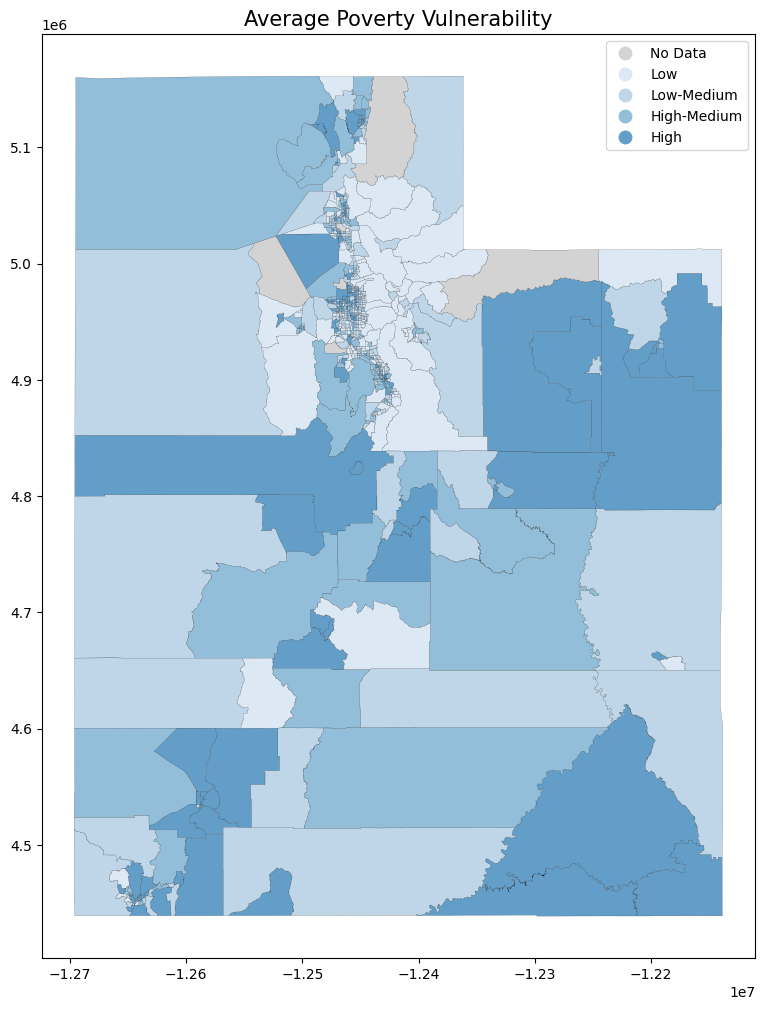

In [70]:
# Poverty Map

pov_data = data[['CensusTract','Year','County','E_POV150']]

# remove rows with NaN values
pov_data = pov_data.dropna()
#display(epa_data)

# get average cancer risk for all years
pov_avg = pov_data.groupby(['CensusTract', 'County'])['E_POV150'].mean().reset_index()
pov_avg.rename(columns={'E_POV150': 'Average E_POV150'}, inplace=True)

# Ensure the GEOID column is the same type in both dataframes, typically a string
geojson['CensusTract'] = geojson['CensusTract'].astype(str)
pov_avg['CensusTract'] = pov_avg['CensusTract'].astype(str)

# Merge the data on the GEOID column
pov_geo = geojson.merge(pov_avg, on='CensusTract', how='left')

# Remove NaN values
pov_geo = pov_geo.fillna(0)

# Convert Total Cancer Risk to int
pov_geo['Average E_POV150'] = pov_geo['Average E_POV150'].astype(int)

# Filter out zero values and create quartiles from the non-zero values
non_zero_data = pov_geo[pov_geo['Average E_POV150'] > 0]
non_zero_data['Risk Quartile'] = pd.qcut(non_zero_data['Average E_POV150'], 4, labels=['Low', 'Low-Medium', 'High-Medium', 'High'])

# Prepare the categorical column with a new category 'Zero'
categories = ['No Data', 'Low', 'Low-Medium', 'High-Medium', 'High']
pov_geo['Risk Quartile'] = pd.Categorical(pov_geo['CensusTract'].map(non_zero_data.set_index('CensusTract')['Risk Quartile']), categories=categories, ordered=True)

# Set zero values' quartile to 'No Data'
pov_geo['Risk Quartile'].fillna('No Data', inplace=True)

# Create a custom colormap
colors = ['Lightgray', '#dce8f4', '#bfd6e8', '#92bed9', '#639ec8']  # Colors from light red to dark red, gray for zero
cmap = ListedColormap(colors)
norm = mcolors.BoundaryNorm([0, 1, 2, 3, 4, 5], cmap.N)

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))
pov_geo.plot(column='Risk Quartile', cmap=cmap, norm=norm, linewidth=0.1, ax=ax, edgecolor='0', legend=True, legend_kwds={'labels': ['No Data', 'Low', 'Low-Medium', 'High-Medium', 'High']})

ax.set_title('Average Poverty Vulnerability', fontsize=15)
plt.show()

In [64]:
#E_POV150 - Persons below 150% poverty estimate
#E_HBURD - Housing cost-burdened occupied housing units with annual income less than $75,000 (30%+ of income spent on housing costs)
#Lalowi1 - Low income population count beyond 1 mile from supermarket

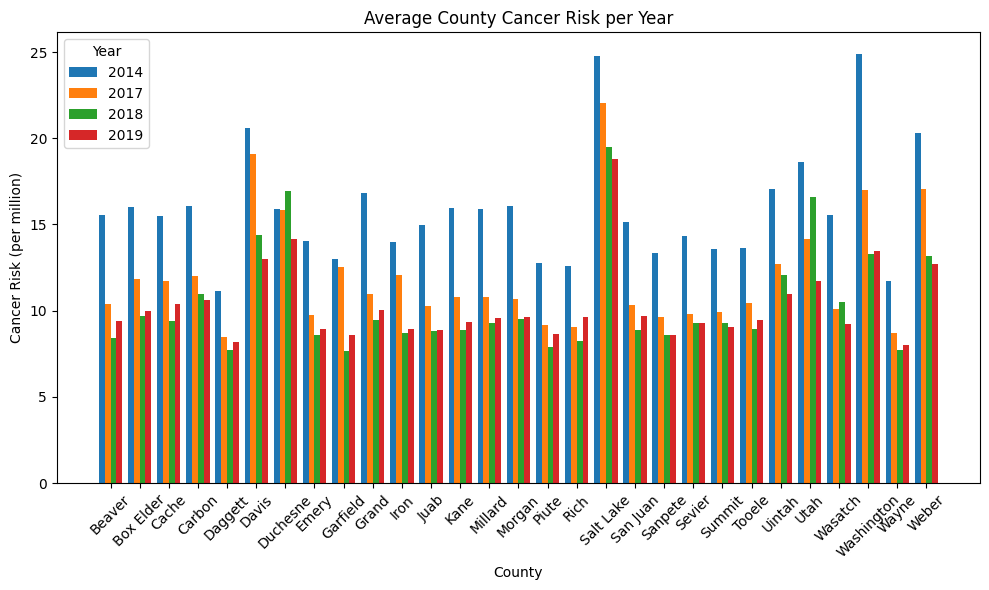

In [63]:
''' “The EPA will generally presume that if the risk to that individual [the Maximum Individual Risk] 
 is no higher than approximately 1 in 10 thousand (100 in 1 million), that risk level is considered acceptable 
 and EPA then considers the other health and risk factors to complete an overall judgment on acceptability.”'''
 # https://www.epa.gov/AirToxScreen/airtoxscreen-frequent-questions
 
#get county average cancer risk
county_avg = epa_data.groupby(['County','Year'])['Total Cancer Risk (per million)'].mean().reset_index()

# Pivot the DataFrame to have years as columns
pivot_df = county_avg.pivot(index='County', columns='Year', values='Total Cancer Risk (per million)')
#display(pivot_df)

# Plotting
bar_width = 0.2
index = np.arange(len(pivot_df.index))
fig, ax = plt.subplots(figsize=(10, 6))
bar_2014 = ax.bar(index - 3 * bar_width / 2, pivot_df[2014], bar_width, label='2014')
bar_2017 = ax.bar(index - bar_width / 2, pivot_df[2017], bar_width, label='2017')
bar_2018 = ax.bar(index + bar_width / 2, pivot_df[2018], bar_width, label='2018')
bar_2019 = ax.bar(index + 3 * bar_width / 2, pivot_df[2019], bar_width, label='2019')

ax.set_title('Average County Cancer Risk per Year')
ax.set_xlabel('County')
ax.set_ylabel('Cancer Risk (per million)')
ax.set_xticks(index)
ax.set_xticklabels(pivot_df.index)
ax.legend(title='Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()